In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n=100, ro=2):
    x1 = np.random.multivariate_normal(mean=[0,0], cov=np.identity(2),size=n)
    x2 = np.random.multivariate_normal(mean=[ro,ro], cov=np.identity(2),size=n)
    y1 = np.array([1 for i in range(n)])
    y2 = np.array([-1 for i in range(n)])
    y = np.concatenate((y1,y2))
    x = np.concatenate((x1,x2))
    idx = np.random.permutation(2*n)
    x = x[idx,:]
    y = y[idx]
    return x,y

def sgn(x):
    return x / abs(x)

def accuracy(y, y_hat):
    return sum(y == y_hat)/len(y)

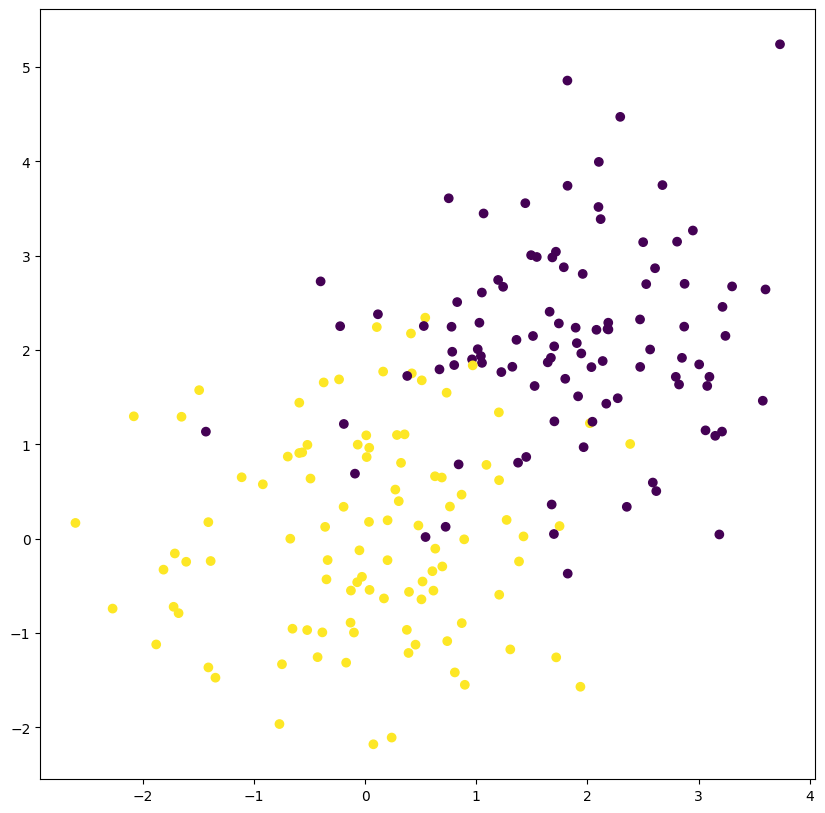

In [3]:
x,y = generate_data(ro=2)

plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [10]:
np.column_stack((x, np.ones(200))) # adding ones

array([[-1.40631025e+00,  8.20604723e-01,  1.00000000e+00],
       [ 5.40827145e+00,  5.03471471e+00,  1.00000000e+00],
       [ 8.71126695e-01,  1.35375108e-01,  1.00000000e+00],
       [ 3.73434752e-01,  9.20952599e-01,  1.00000000e+00],
       [ 4.51576834e+00,  6.70836239e+00,  1.00000000e+00],
       [-5.77666612e-01, -9.34276172e-01,  1.00000000e+00],
       [ 9.35712271e-01, -2.84410467e-01,  1.00000000e+00],
       [ 4.73039494e+00,  4.67587991e+00,  1.00000000e+00],
       [ 7.16151980e+00,  3.46300794e+00,  1.00000000e+00],
       [-2.26805283e-01, -9.04299181e-01,  1.00000000e+00],
       [-2.14798067e+00, -2.77937986e+00,  1.00000000e+00],
       [ 5.76045501e+00,  4.53258233e+00,  1.00000000e+00],
       [ 1.72617366e-01, -1.44902935e-01,  1.00000000e+00],
       [-7.27026301e-01,  3.14661299e-01,  1.00000000e+00],
       [ 6.51279268e-01, -1.32123198e+00,  1.00000000e+00],
       [ 5.95588724e+00,  4.86045964e+00,  1.00000000e+00],
       [ 3.75243552e+00,  3.74152963e+00

In [4]:
from Algorithm import CoordinateDescent

cd = CoordinateDescent(C=2)
cd.fit(np.column_stack((x, np.ones(200))),y)

In [5]:
w = cd.process()

In [6]:
w # the last one is the bias

array([-0.52778887, -0.53394366,  1.05862041])

In [7]:
xd = (w[0:-1] @ x.T) + w[-1]
xd = sgn(xd)

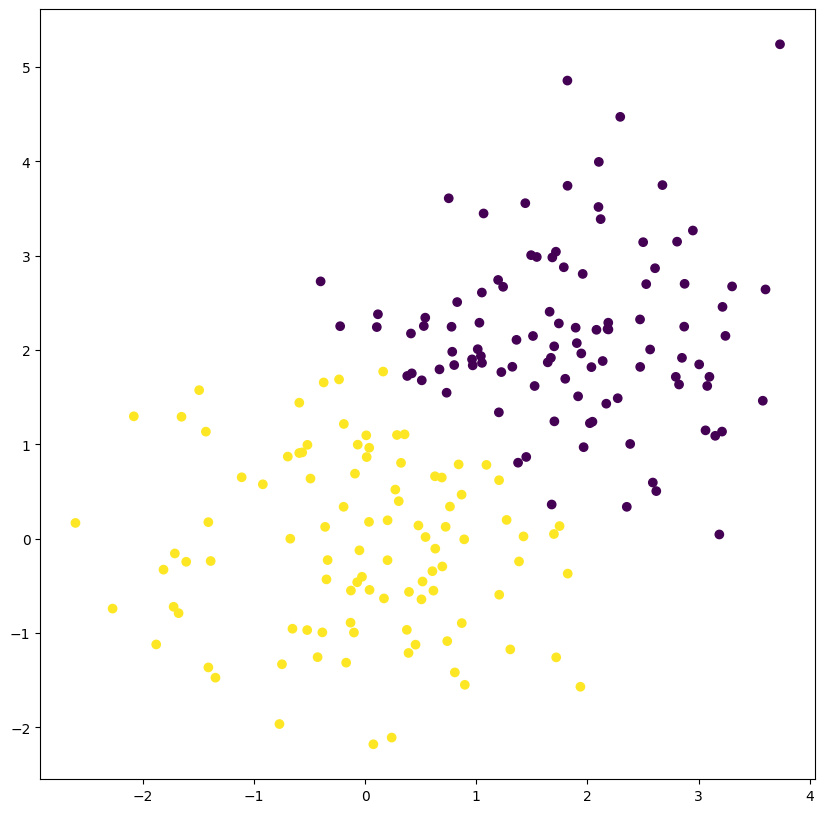

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=xd)
plt.show()

In [12]:
accuracy(y, xd)

0.91